# Text Classification

## Sentiment Analysis

Sentiment Analysis (also known as opinion mining or emotion AI) is a sub-field of NLP that tries to identify and extract opinions within a given text across blogs, reviews, social media, forums, news etc. 

Sentiment Analysis can help craft all this exponentially growing unstructured text into structured data using NLP and open source tools. For example Twitter is a treasure trove of sentiment and users are making their reactions and opinions for every topic under the sun.

Predicting if a sentence is a positive sentiment or negative sentiment

In [6]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Reading the dataset

In [7]:
sentiment_df = pd.read_csv('sentiment_train', sep = '\t')

In [8]:
pd.set_option('max_colwidth', 800)

In [9]:
sentiment_df.sample(4)

,sentiment,text
3381,1,"Anyway, thats why I love "" Brokeback Mountain."
5300,0,"Always knows what I want, not guy crazy, hates Harry Potter.."
1815,1,the last stand and Mission Impossible 3 both were awesome movies.
5141,0,"I don't understand how that pic is funny, but Harry Potter sucks anyways."


In [10]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


### Class Representation

How many examples are from each class: Positive and negative?

In [11]:
sentiment_df.sentiment.value_counts()

1    3943
0    2975
Name: sentiment, dtype: int64

In [12]:
sentiment_df.shape

(6918, 2)

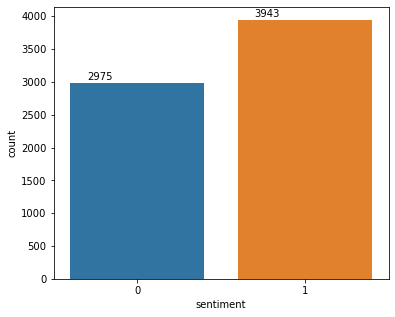

In [13]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

plt.figure( figsize=(6,5))
# create count plot 
ax = sn.countplot(x='sentiment', data=sentiment_df)
# annotate
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))

### Vectorizing the sentences

In order to address this, scikit-learn provides utilities for the most common ways to extract numerical features from text content, namely:

- tokenizing strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.

- counting the occurrences of tokens in each document.

- normalizing and weighting with diminishing importance tokens that occur in the majority of samples / documents.

In this scheme, features and samples are defined as follows:

each individual token occurrence frequency (normalized or not) is treated as a feature.

the vector of all the token frequencies for a given document is considered a multivariate sample.

A corpus of documents can thus be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [15]:
count_vec = CountVectorizer()

In [16]:
count_vec.fit(sentiment_df.text)

CountVectorizer()

In [17]:
train_ds = count_vec.transform(sentiment_df.text)

In [18]:
train_ds

<6918x2132 sparse matrix of type '<class 'numpy.int64'>'
	with 65398 stored elements in Compressed Sparse Row format>

In [19]:
feature_names = count_vec.get_feature_names()

In [20]:
len(feature_names)

2132

### Frequency of words

Finding out high frequency and low frequency words.

In [21]:
import numpy as np

In [22]:
feature_freq = np.sum(train_ds.toarray(), axis = 0)

In [23]:
features_df = pd.DataFrame( {'feature': feature_names,
                             'frequency': feature_freq} )

In [24]:
features_df.sort_values('frequency', ascending=False)[0:20]

,feature,frequency
1864,the,3306
93,and,2154
864,harry,2093
1466,potter,2093
355,code,2002
2009,vinci,2001
442,da,2001
1272,mountain,2000
259,brokeback,2000
1171,love,1624


## Exercise:

- Create a histogram of word frequencies
- What is key pattern that you observe?

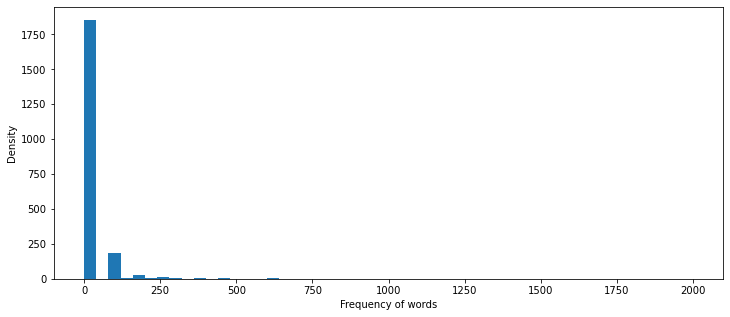

In [30]:
plt.figure( figsize=(12,5))
plt.hist(features_df.frequency, bins=50, range = (0, 2000));
plt.xlabel( 'Frequency of words' )
plt.ylabel( 'Density' );

## Exercise

- Find out words that has occurred just once?
- How many such words exist?

### Stop Words

Stop words are words like “and”, “the”, “him”, which are presumed to be uninformative in representing the content of a text, and which may be removed to avoid them being construed as signal for prediction. Sometimes, however, similar words are useful for prediction, such as in classifying writing style or personality.

There are several known issues in our provided ‘english’ stop word list. It does not aim to be a general, ‘one-size-fits-all’ solution as some tasks may require a more custom solution. See [NQY18] for more details.

Please take care in choosing a stop word list. Popular stop word lists may include words that are highly informative to some tasks, such as computer.

You should also make sure that the stop word list has had the same preprocessing and tokenization applied as the one used in the vectorizer. The word we’ve is split into we and ve by CountVectorizer’s default tokenizer, so if we’ve is in stop_words, but ve is not, ve will be retained from we’ve in transformed text. Our vectorizers will try to identify and warn about some kinds of inconsistencies.

In [21]:
from sklearn.feature_extraction import text

In [22]:
stopwords = text.ENGLISH_STOP_WORDS

- Add custom words to the stopwords list

In [23]:
stopwords = stopwords.union(['movie'])

### New Count Vectorizer

**max_dffloat or int, default=1.0**
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float in range [0.0, 1.0], the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

**min_dffloat or int, default=1**
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float in range of [0.0, 1.0], the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

In [24]:
count_vec = CountVectorizer(stop_words = stopwords,
                            min_df = 3,
                            max_df = 0.8)

In [25]:
count_vec.fit(sentiment_df.text)
train_ds = count_vec.transform(sentiment_df.text)
feature_names = count_vec.get_feature_names()
feature_freq = np.sum(train_ds.toarray(), axis = 0)
features_df = pd.DataFrame( {'feature': feature_names,
                             'frequency': feature_freq} )

In [26]:
len(feature_names)

435

### Distribution of words across different sentiment

In [27]:
# Convert the document vector matrix into dataframe
train_ds_df = pd.DataFrame(train_ds.todense())
# Assign the features names to the column
train_ds_df.columns = feature_names
# Assign the sentiment labels to the train_ds
train_ds_df['sentiment'] = sentiment_df.sentiment

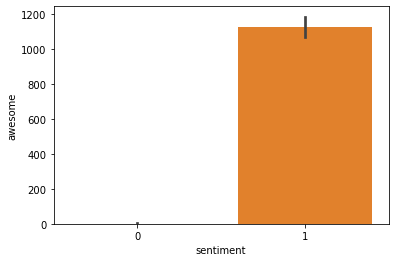

In [28]:
sn.barplot( x = 'sentiment', y = 'awesome', data = train_ds_df, estimator=sum );

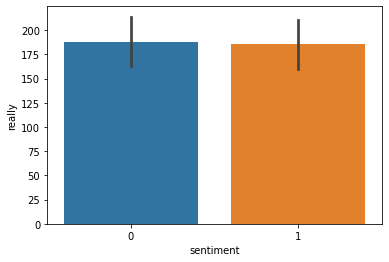

In [29]:
sn.barplot( x = 'sentiment', y = 'really', data = train_ds_df, estimator=sum );

## Exercise:

- Create bar plot of 3 more words: 
    - One for positive sentiment
    - One for negative sentiment
    - One for neutral sentiment

### Splitting the dataset

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, \
y_train, y_test = train_test_split(train_ds,
                                   sentiment_df.sentiment,
                                   train_size = 0.8)

In [32]:
X_train.shape

(5534, 435)

In [33]:
X_test.shape

(1384, 435)

### Build  a Naive Bayes Model

https://scikit-learn.org/stable/modules/naive_bayes.html

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
nb = MultinomialNB()

In [36]:
nb.fit(X_train, y_train)

MultinomialNB()

### Evaluating the model

In [37]:
y_pred = nb.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
cm_v1 = confusion_matrix(y_test, y_pred, [1,0])

In [40]:
import seaborn as sn
import matplotlib.pyplot as plt

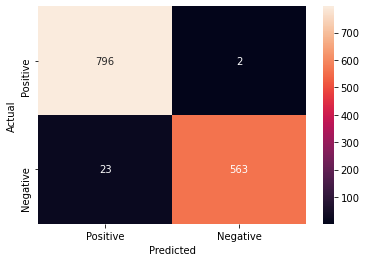

In [41]:
sn.heatmap(cm_v1,
           fmt='.0f',
           annot = True,
           xticklabels = ['Positive', 'Negative'],
           yticklabels = ['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual');

## Exercise:

- Find total accuracy of the model
- Find recall of the model

## Exercise:

- Build a logistic regression model
- Find the accuracy

### Using TF-IDF Vectorizer

In a large text corpus, some words will be very present (e.g. “the”, “a”, “is” in English) hence carrying very little meaningful information about the actual contents of the document. If we were to feed the direct count data directly to a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms.

In order to re-weight the count features into floating point values suitable for usage by a classifier it is very common to use the tf–idf transform.

Tf means term-frequency while tf–idf means term-frequency times inverse document-frequency: .

https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

In [42]:
tfidf_vec = TfidfVectorizer(stop_words = stopwords,
                            min_df = 3,
                            max_df = 0.8)

In [43]:
tfidf_vec.fit(sentiment_df.text)
train_ds = tfidf_vec.transform(sentiment_df.text)
feature_names = tfidf_vec.get_feature_names()

### Splitting the dataset

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, \
y_train, y_test = train_test_split(train_ds,
                                   sentiment_df.sentiment,
                                   train_size = 0.8)

In [46]:
X_train.shape

(5534, 435)

In [47]:
X_test.shape

(1384, 435)

### Build  a Naive Bayes Model

In [48]:
from sklearn.naive_bayes import MultinomialNB

In [49]:
nb = MultinomialNB()

In [50]:
nb.fit(X_train, y_train)

MultinomialNB()

### Evaluating the model

In [51]:
y_pred = nb.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
cm_v1 = confusion_matrix(y_test, y_pred, [1,0])

In [54]:
import seaborn as sn
import matplotlib.pyplot as plt

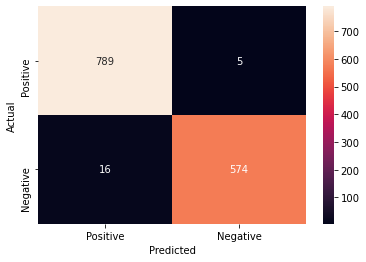

In [55]:
sn.heatmap(cm_v1,
           fmt='.0f',
           annot = True,
           xticklabels = ['Positive', 'Negative'],
           yticklabels = ['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       590
           1       0.98      0.99      0.99       794

    accuracy                           0.98      1384
   macro avg       0.99      0.98      0.98      1384
weighted avg       0.98      0.98      0.98      1384



### Random Forest Classifier

In random forests (see RandomForestClassifier and RandomForestRegressor classes), each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.

Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size max_features. (See the parameter tuning guidelines for more details).

The purpose of these two sources of randomness is to decrease the variance of the forest estimator. Indeed, individual decision trees typically exhibit high variance and tend to overfit. The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model.

https://scikit-learn.org/stable/modules/ensemble.html#forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf = RandomForestClassifier(n_estimators = 100,
                            max_features = 0.4,
                            max_depth = 10)

In [89]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=0.4)

In [90]:
y_pred_rf = rf.predict(X_test)

In [91]:
cm_rf = confusion_matrix(y_pred_rf, y_pred, [1,0])

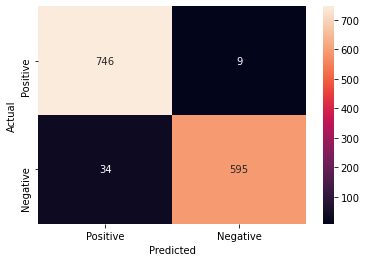

In [92]:
sn.heatmap(cm_rf,
           fmt='.0f',
           annot = True,
           xticklabels = ['Positive', 'Negative'],
           yticklabels = ['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [93]:
feaures_imp = pd.DataFrame({'feature': feature_names,
                            'importance': rf.feature_importances_})

In [94]:
feaures_imp.sort_values('importance', ascending = False)[0:20]

,feature,importance
245,love,0.247910
19,awesome,0.192152
246,loved,0.079877
230,like,0.076057
198,impossible,0.071419
263,mission,0.046507
365,sucked,0.046353
24,beautiful,0.038581
367,sucks,0.029377
173,hate,0.017686


In [95]:
feaures_imp.sort_values('importance', ascending = False)[-20:]

,feature,importance
167,guys,0.0
199,inaccurate,0.0
184,hella,0.0
194,hung,0.0
191,hoot,0.0
190,homosexuality,0.0
188,hips,0.0
187,hill,0.0
186,hey,0.0
185,helped,0.0


### Apply stemming

Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”. Stemming is an important part of the pipelining process in Natural language processing. The input to the stemmer is tokenized words.

**Porter’s Stemmer algorithm**
It is one of the most popular stemming methods proposed in 1980. It is based on the idea that the suffixes in the English language are made up of a combination of smaller and simpler suffixes. This stemmer is known for its speed and simplicity. 

In [96]:
from nltk.stem import PorterStemmer

In [97]:
stemmer = PorterStemmer()
analyzer = TfidfVectorizer().build_analyzer()

In [98]:
def stem_docs(doc):
    non_stop_words = [word for word in analyzer(doc) 
                      if word not in stopwords]    
    stemmed_words = [stemmer.stem(w) for w in non_stop_words]
    return stemmed_words

In [99]:
count_vec = TfidfVectorizer(analyzer=stem_docs,
                            min_df = 3,
                            max_df = 0.8)

In [100]:
count_vec.fit(sentiment_df.text)

TfidfVectorizer(analyzer=<function stem_docs at 0x136c17430>, max_df=0.8,
                min_df=3)

In [101]:
train_ds = count_vec.transform(sentiment_df.text)

In [102]:
feature_names = count_vec.get_feature_names()

In [103]:
len(feature_names)

431

In [104]:
X_train, X_test, \
y_train, y_test = train_test_split(train_ds,
                                   sentiment_df.sentiment,
                                   train_size = 0.8)

In [105]:
rf = RandomForestClassifier(n_estimators = 100,
                            max_features = 0.4,
                            max_depth = 10)

In [106]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=0.4)

In [107]:
y_pred_rf = rf.predict(X_test)

In [108]:
cm_rf = confusion_matrix(y_pred_rf, y_pred, [1,0])

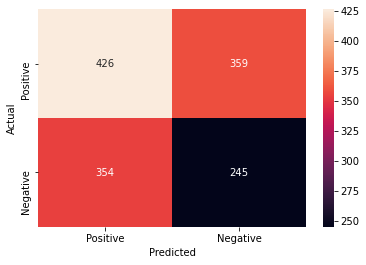

In [109]:
sn.heatmap(cm_rf,
           fmt='.0f',
           annot = True,
           xticklabels = ['Positive', 'Negative'],
           yticklabels = ['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [110]:
feaures_imp = pd.DataFrame({'feature': feature_names,
                            'importance': rf.feature_importances_})

In [111]:
feaures_imp.sort_values('importance', ascending = False)[0:20]

,feature,importance
368,suck,0.220999
251,love,0.196343
183,hate,0.110601
22,awesom,0.103317
41,brokeback,0.056167
271,mountain,0.055258
239,like,0.044588
208,imposs,0.030995
267,mission,0.026762
26,beauti,0.026226
